In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [205]:
train = pd.read_csv('train_BF.csv')
test = pd.read_csv('test_BF.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [207]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [208]:
#check for duplicates
idsUnique = len(train.User_ID.unique()) #or can also use the set() command
idsUnique

5891

In [209]:
idsTotal = train.User_ID.shape[0]
idsTotal

550068

In [210]:
idsDuplicate = idsTotal - idsUnique
idsDuplicate

544177

# Exploratory Data Analysis (EDA)
 
1.1. Univariate Distribution

1.1.1. Distribution of the target variable : Home Sales Price

Text(0.5, 1.0, 'Purchase amount Distribution')

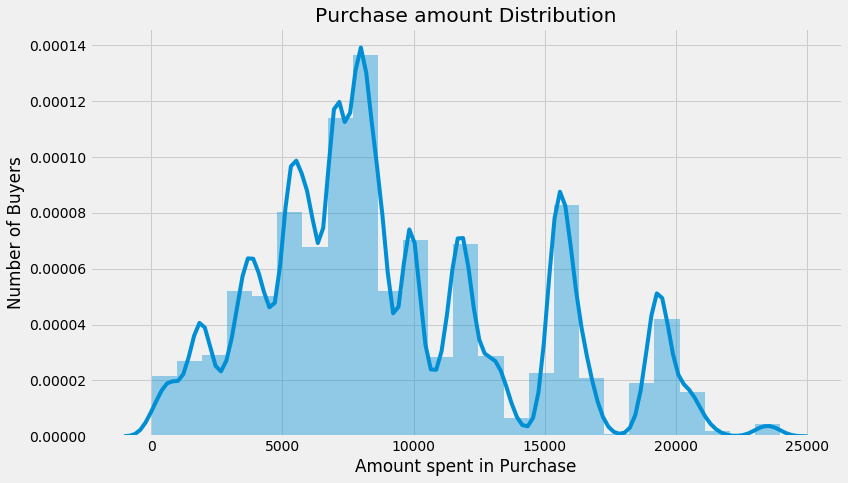

In [211]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins=25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [212]:
print ("Skew is:", train.Purchase.skew())
print("Kurtosis: %f" % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378



1.1.2. Numerical Variables

In [213]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

1.1.2.1. Distribution of the Occupation variable

In [214]:
train.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

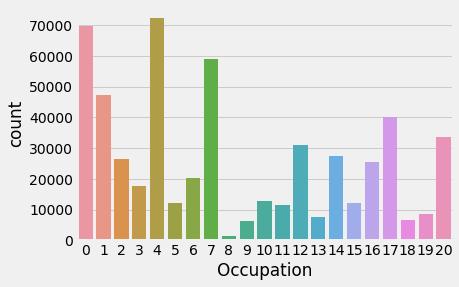

In [215]:
sns.countplot(train.Occupation)


1.1.2.2. Distribution of the Marital_Status variable

In [216]:
train.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

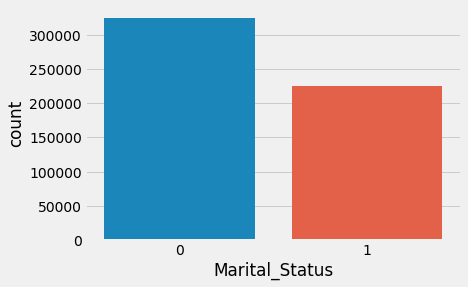

In [217]:
sns.countplot(train.Marital_Status)

1.1.2.3. Distribution of the Product_Category_1 variable

In [218]:
train.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

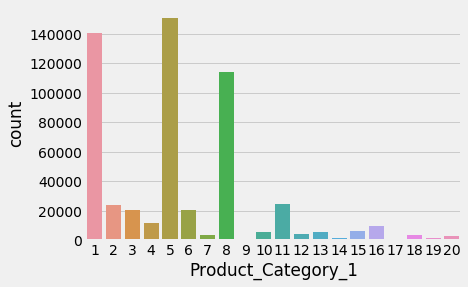

In [219]:
sns.countplot(train.Product_Category_1)


1.1.2.4. Distribution of the Product_Category_2 variable

In [220]:
train.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

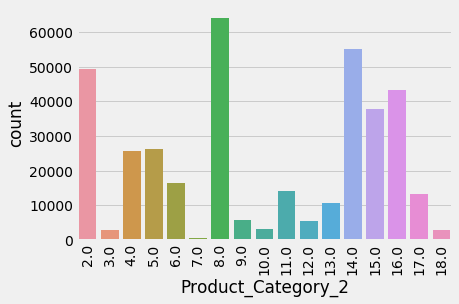

In [221]:
sns.countplot(train.Product_Category_2)
plt.xticks(rotation=90)


1.1.2.5. Distribution of the Product_Category_3 variable

In [222]:
train.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

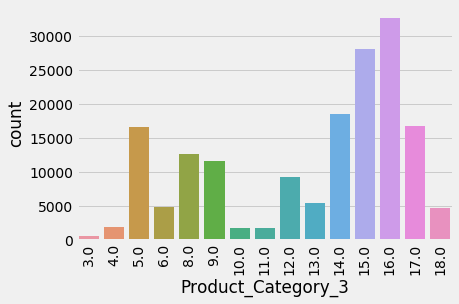

In [223]:
sns.countplot(train.Product_Category_3)
plt.xticks(rotation=90)


1.1.2.6. Correlation between Numerical Predictors and Target variable

In [224]:
corr = numeric_features.corr()
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [225]:
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


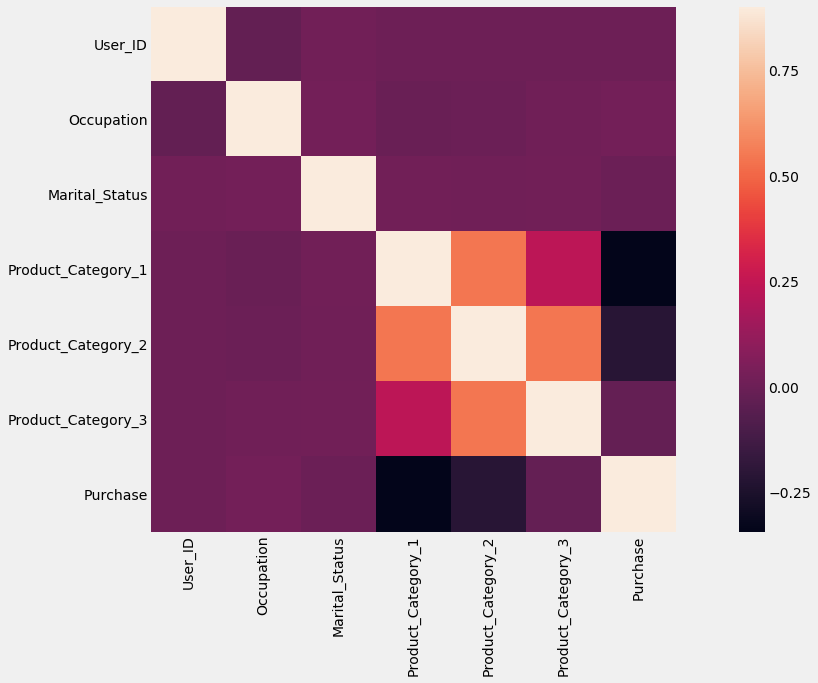

In [226]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
#Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
#Having fig is useful if you want to change figure-level attributes or save the figure as an image file later 
#(e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object 
#but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), 
#have a parent figure object anyway.


sns.heatmap(corr, vmax=.9, square=True);

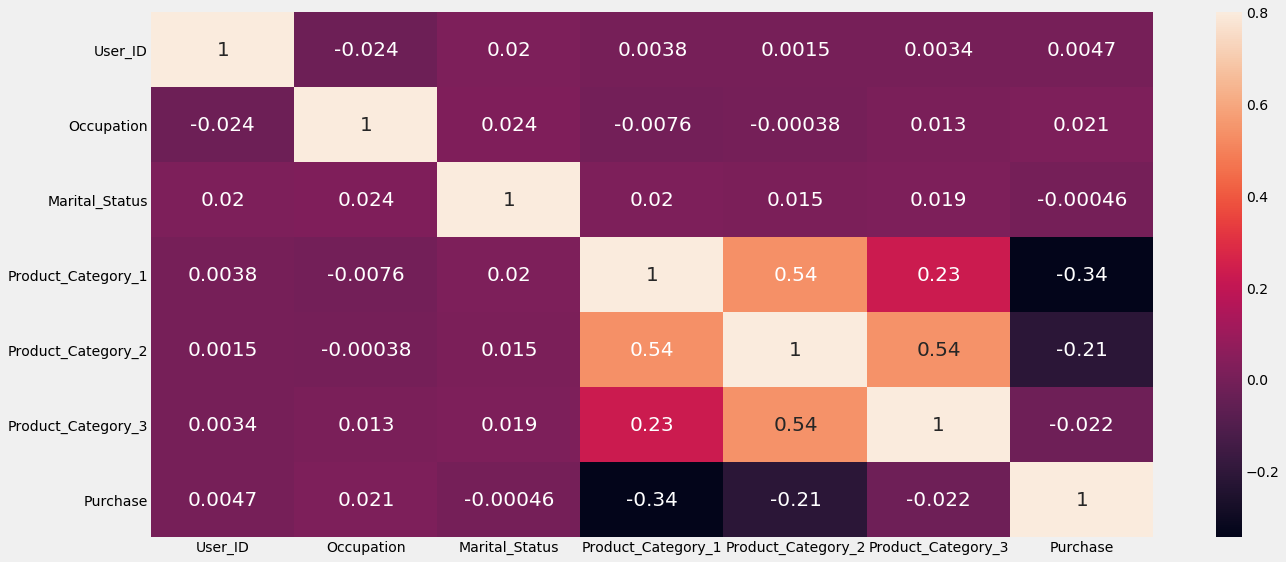

In [227]:

#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

In [228]:

#Correlations Between Attributes
#Pearson’s Correlation
#Coefficient, that assumes a normal distribution of the attributes involved"""

s = corr.unstack()
#s.sort_values(kind="quicksort")
s

User_ID             User_ID               1.000000
                    Occupation           -0.023971
                    Marital_Status        0.020443
                    Product_Category_1    0.003825
                    Product_Category_2    0.001529
                    Product_Category_3    0.003419
                    Purchase              0.004716
Occupation          User_ID              -0.023971
                    Occupation            1.000000
                    Marital_Status        0.024280
                    Product_Category_1   -0.007618
                    Product_Category_2   -0.000384
                    Product_Category_3    0.013263
                    Purchase              0.020833
Marital_Status      User_ID               0.020443
                    Occupation            0.024280
                    Marital_Status        1.000000
                    Product_Category_1    0.019888
                    Product_Category_2    0.015138
                    Product_Cat


1.1.3. Categorical Variables

1.1.3.1. Distribution of the variable Gender

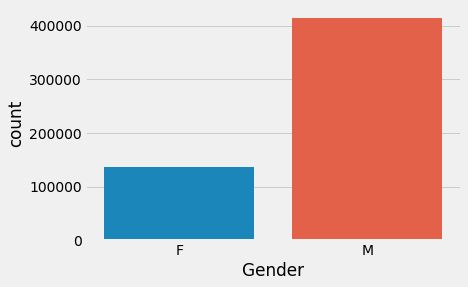

In [229]:
sns.countplot(train.Gender)


1.1.3.2. Distribution of the variable Age

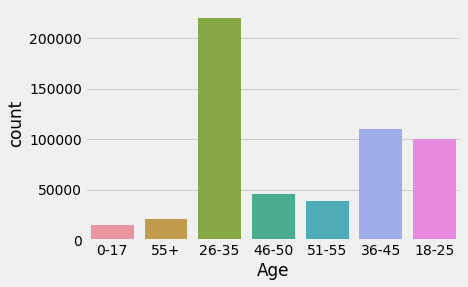

In [230]:
sns.countplot(train.Age)


1.1.3.3. Distribution of the variable City_Category

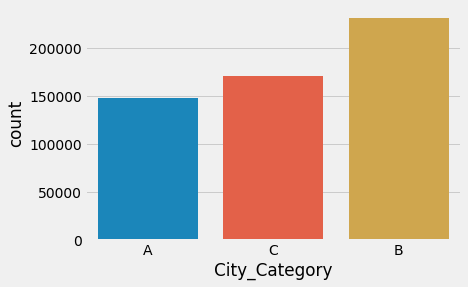

In [231]:
sns.countplot(train.City_Category)


1.1.3.4. Distribution of the variable Stay_In_Current_City_Years

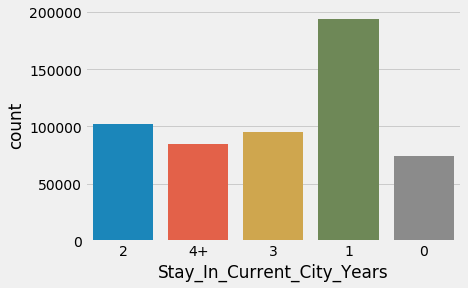

In [232]:
sns.countplot(train.Stay_In_Current_City_Years)


1.2. Bivariate Distribution

1.2.1. Numerical Variables

1.2.1.1. Occupation and Purchase Analysis

Text(0, 0.5, 'Purchase Amount')

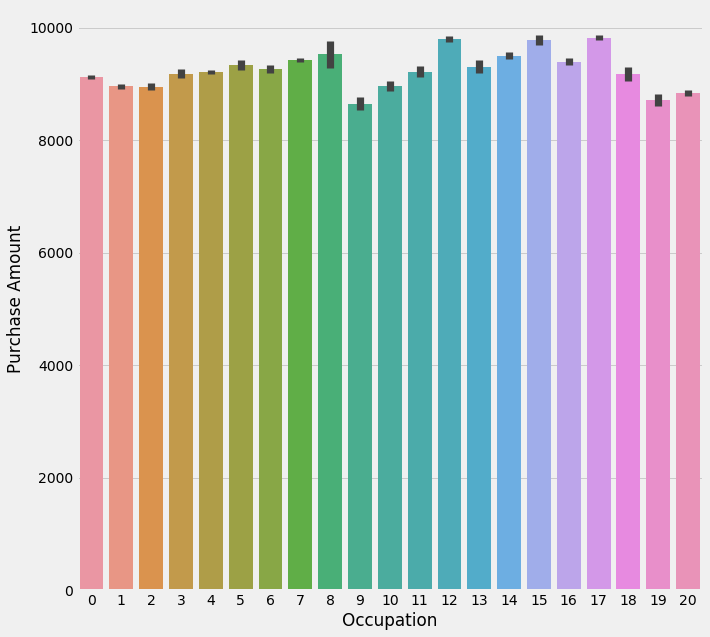

In [233]:
plt.figure(figsize=(10,10))
sns.barplot(x=train.Occupation, y=train.Purchase)
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')



1.2.1.2. Marital_Status and Purchase Analysis

Text(0, 0.5, 'Purchase Amount')

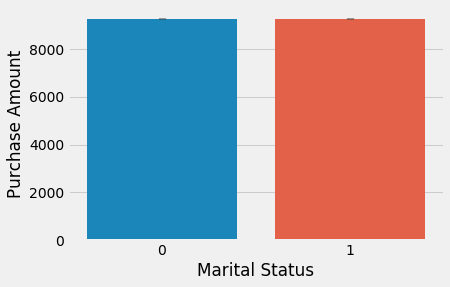

In [234]:
sns.barplot(x=train.Marital_Status, y=train.Purchase)
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')


1.2.1.3. Product_Category_1 and Purchase Analysis

Text(0, 0.5, 'Purcahse Amount')

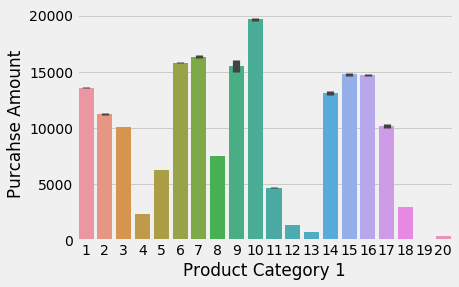

In [235]:
sns.barplot(x=train.Product_Category_1, y=train.Purchase)
plt.xlabel('Product Category 1')
plt.ylabel('Purcahse Amount')


1.2.1.4. Product_Category_2 and Purchase Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

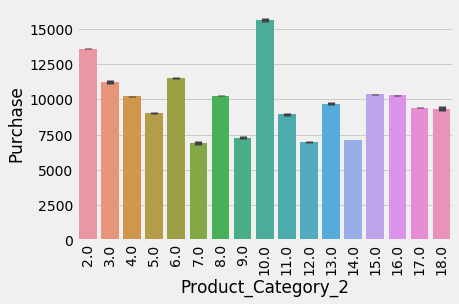

In [236]:
sns.barplot(x=train.Product_Category_2, y=train.Purchase)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

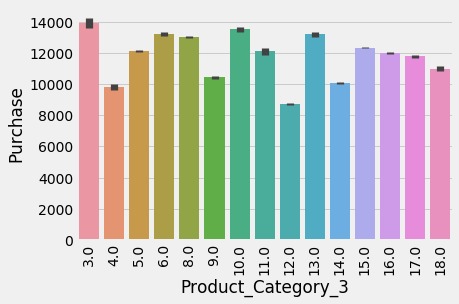

In [237]:
sns.barplot(x=train.Product_Category_3, y=train.Purchase) #default estimator = np.mean
plt.xticks(rotation=90)

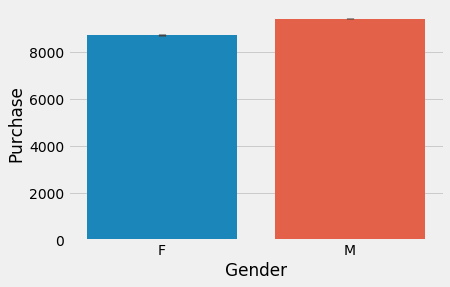

In [238]:
sns.barplot(x=train.Gender, y=train.Purchase)

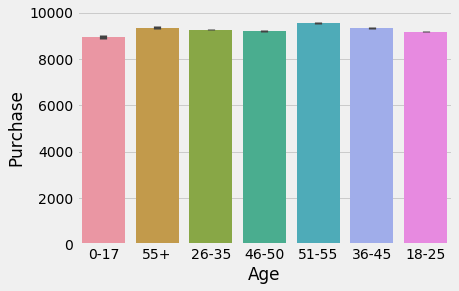

In [239]:
sns.barplot(x=train.Age, y=train.Purchase)

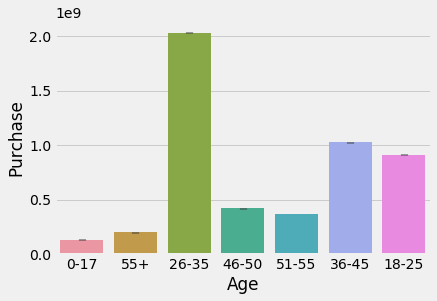

In [240]:
sns.barplot(x=train.Age, y=train.Purchase, estimator = np.sum)

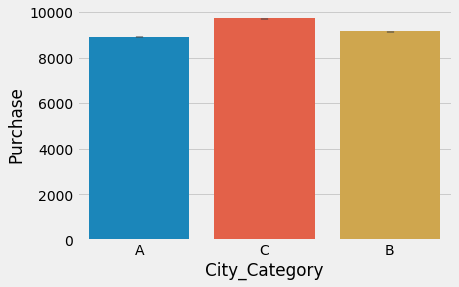

In [241]:
sns.barplot(x=train.City_Category, y=train.Purchase)

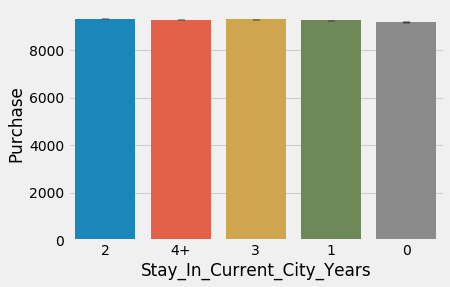

In [242]:
sns.barplot(x=train.Stay_In_Current_City_Years, y=train.Purchase)

# Data Pre-Processing

In [243]:
#Join Train and Test Dataset
train['source'] = 'train'
test['source'] = 'test'
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,train


In [244]:
data = pd.concat([train,test], ignore_index=True, sort=False)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0,train
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0,train
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0,train


In [245]:
print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


# 2.1. Analysing Null or missing Values

In [246]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

In [247]:
#imputing NAN values with fillna(-2.0)
data['Product_Category_2'] = data['Product_Category_2'].fillna(-2.0).astype('float')

In [248]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2             0.000000
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

In [249]:
data['Product_Category_2'].value_counts().sort_index()

-2.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [250]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(-2.0).astype('float')
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2             0.000000
Product_Category_3             0.000000
Purchase                      29.808452
source                         0.000000
dtype: float64

In [251]:
data['Product_Category_3'].value_counts().sort_index()

-2.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

# 2.1.2. Removing Product_Category_1 group 19 and 20 from Train

In [252]:
data.shape

(783667, 13)

In [253]:
#Get index of all columns with product_category_1 equal 19 or 20 from train
condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source== 'train')]
condition

Int64Index([545915, 545916, 545917, 545918, 545919, 545920, 545921, 545922,
            545923, 545924,
            ...
            550058, 550059, 550060, 550061, 550062, 550063, 550064, 550065,
            550066, 550067],
           dtype='int64', length=4153)

In [254]:
data = data.drop(condition)
data.shape

(779514, 13)

# Categorical Values

In [255]:
#Apply function len(unique()) to every data variable
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3672
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17996
source                            2
dtype: int64

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779514 entries, 0 to 783666
Data columns (total 13 columns):
User_ID                       779514 non-null int64
Product_ID                    779514 non-null object
Gender                        779514 non-null object
Age                           779514 non-null object
Occupation                    779514 non-null int64
City_Category                 779514 non-null object
Stay_In_Current_City_Years    779514 non-null object
Marital_Status                779514 non-null int64
Product_Category_1            779514 non-null int64
Product_Category_2            779514 non-null float64
Product_Category_3            779514 non-null float64
Purchase                      545915 non-null float64
source                        779514 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 83.3+ MB


# 2.2.1. Frequency Analysis

In [257]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = data.select_dtypes(include=['object']).columns.drop(['source'])
category_cols

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [258]:
#frequency of categories
for col in category_cols:
    frequency = data[col].value_counts()
    print("\nFrequency distribution of " + col + ':')
    print(frequency)


Frequency distribution of Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
P00057642    2079
P00184942    2066
P00058042    2014
P00237542    1999
P00145042    1991
P00117942    1985
P00110942    1976
P00059442    1949
P00010742    1922
P00255842    1914
P00110842    1834
P00220442    1833
P00051442    1794
P00117442    1785
P00102642    1782
P00242742    1774
P00148642    1758
P00031042    1737
P00278642    1735
P00080342    1719
P00028842    1713
P00034742    1690
P00251242    1682
P00114942    1673
P00000142    1636
             ... 
P00068342       1
P00353742       1
P00074842       1
P00065542       1
P00065942       1
P0099542        1
P00348142       1
P00340742       1
P00364342       1
P00091542       1
P00329842       1
P00314742       1
P00069742       1
P00149742       1
P00306542       1
P00059342       1
P00065142       1
P00062342       1
P00069642       1
P00039042       1
P00068742       1
P00365942       1
P001327

# Feature Engineering
3.1. Converting gender to binary

In [259]:
gen_map = {'M':1, 'F':0}
data['Gender'] = data['Gender'].map(gen_map)

In [260]:
data['Gender'].value_counts()

1    587052
0    192462
Name: Gender, dtype: int64

In [261]:
data['Gender'].isnull().sum()

0

## 3.2. Converting Age to numeric values  

In [262]:
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data['Age'] = data['Age'].map(age_dict)

In [263]:
data.Age.value_counts().sort_index()

0     21185
1    141209
2    311554
3    155898
4     64902
5     54450
6     30316
Name: Age, dtype: int64

## 3.3. Converting city_category to binary

In [264]:
data.City_Category.value_counts()

B    328524
C    241487
A    209503
Name: City_Category, dtype: int64

In [265]:
city_map = {'A':0, 'B':1, 'C':2}
data['City_Category'] = data['City_Category'].map(city_map)

In [266]:
data.City_Category.value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

## 3.4. Converting Stay_In_Current_City_Years to binary 

In [267]:
data.Stay_In_Current_City_Years.value_counts()

1     274937
2     144599
3     134750
4+    120054
0     105174
Name: Stay_In_Current_City_Years, dtype: int64

In [268]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
data['Stay_In_Current_City_Years'].value_counts()

1    274937
2    144599
3    134750
4    120054
0    105174
Name: Stay_In_Current_City_Years, dtype: int64

In [269]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

In [270]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,0,10,0,0,3,-2.0,-2.0,8370.0,train,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200.0,train,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,-2.0,-2.0,1422.0,train,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,-2.0,1057.0,train,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,-2.0,-2.0,7969.0,train,0,0,0,0,1


In [271]:
data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

# # 3.5. Function to create count features

In [272]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [273]:
#data["User_ID_Count"]  = getCountVar(data, data, "User_ID")
data["Age_Count"]  =getCountVar(data, data, "Age")

In [274]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count
0,1000001,P00069042,0,0,10,0,0,3,-2.0,-2.0,8370.0,train,0,0,1,0,0,21185
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200.0,train,0,0,1,0,0,21185
2,1000001,P00087842,0,0,10,0,0,12,-2.0,-2.0,1422.0,train,0,0,1,0,0,21185
3,1000001,P00085442,0,0,10,0,0,12,14.0,-2.0,1057.0,train,0,0,1,0,0,21185
4,1000002,P00285442,1,6,16,2,0,8,-2.0,-2.0,7969.0,train,0,0,0,0,1,30316


In [275]:
data["Occupation_Count"]  =getCountVar(data, data, "Occupation")

In [276]:
data["Product_Category_1_Count"]  =getCountVar(data, data, "Product_Category_1")
data["Product_Category_2_Count"]  =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"]  =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"]  =getCountVar(data, data, "Product_ID")

## 3.6.Exporting Data 

In [277]:
#divide data back into train and test
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [278]:
#drop unnecessary columns
train.drop(['source'], axis=1, inplace=True)
test.drop(['source'], axis=1, inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [279]:
#export files as modified versions
train.to_csv('BF_train_mod.csv', index=False)
test.to_csv('BF_test_mod.csv', index=False)

# Model

In [280]:
train_df = pd.read_csv('BF_train_mod.csv')
test_df = pd.read_csv('BF_test_mod.csv')

In [281]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000001,P00069042,0,0,10,0,0,3,-2.0,-2.0,...,0,1,0,0,21185,18171,28791,241829,541656,344
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,...,0,1,0,0,21185,18171,200699,23575,26283,845
2,1000001,P00087842,0,0,10,0,0,12,-2.0,-2.0,...,0,1,0,0,21185,18171,5610,241829,541656,150
3,1000001,P00085442,0,0,10,0,0,12,14.0,-2.0,...,0,1,0,0,21185,18171,5610,78834,541656,496
4,1000002,P00285442,1,6,16,2,0,8,-2.0,-2.0,...,0,0,0,1,30316,35944,162294,241829,541656,283


In [283]:
train_df.shape

(545915, 22)

In [284]:
test_df.shape

(233599, 22)

In [297]:
train_df.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4',
       'Age_Count', 'Occupation_Count', 'Product_Category_1_Count',
       'Product_Category_2_Count', 'Product_Category_3_Count',
       'Product_ID_Count'],
      dtype='object')

In [298]:
target = 'Purchase'
IDcol = ['User_ID', 'Product_ID']

In [299]:
target

'Purchase'

In [300]:
IDcol

['User_ID', 'Product_ID']

In [302]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

In [304]:
predictors = train_df.columns.drop(['Purchase', 'Product_ID', 'User_ID'])
LR.fit(train_df[predictors], train_df['Purchase'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [307]:
train_df_pred = LR.predict(train_df[predictors])

In [308]:
train_df_pred

array([11274.875  , 10416.0625 ,  6512.     , ...,  7006.5    ,
        9970.375  , 10629.78125])

In [313]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Perform cross-validation:
cv_score = cross_val_score(LR, train_df[predictors], train_df['Purchase'], cv=20, 
                                            scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
cv_score

array([4285.85274591, 4311.29193665, 4353.35783615, 4365.53777142,
       4371.84726725, 4309.0141793 , 4368.23552705, 4282.91825911,
       4349.96954589, 4350.94259048, 4318.14717943, 4373.19344105,
       4356.33438952, 4301.94091079, 4346.303202  , 4357.52378992,
       4394.2805085 , 4312.03916833, 4333.52875871, 4343.27567296])

In [316]:
#predict test results
test_df['Purchase'] = LR.predict(test_df[predictors])
test_df['Purchase'].head()

0    11871.34375
1    11572.81250
2     6750.09375
3     9830.00000
4    12848.50000
Name: Purchase, dtype: float64

In [317]:
#export submission file
IDcol.append(target)
IDcol

['User_ID', 'Product_ID', 'Purchase']

In [318]:
submission = pd.DataFrame({x: test_df[x] for x in IDcol})
submission.to_csv('BF_Submission_LR.csv', index=False)
sub = pd.read_csv('BF_Submission_LR.csv')
sub.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,11871.34375
1,1000009,P00113442,11572.81250
2,1000010,P00288442,6750.09375
3,1000010,P00145342,9830.00000
4,1000011,P00053842,12848.50000


In [321]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df['Purchase']).values, train_df_pred)))

RMSE : 4339


In [335]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.01, normalize =True)
RR.fit(train_df[predictors], train_df['Purchase'])
train_df_pred_RR = RR.predict(train_df[predictors])

print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df['Purchase']).values, train_df_pred_RR)))

RMSE : 4340


In [346]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=20, min_samples_leaf=10)
DT.fit(train_df[predictors], train_df['Purchase'])
train_df_pred_DT = DT.predict(train[predictors])

print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df['Purchase']).values, train_df_pred_DT )))

RMSE : 2465


In [347]:
#predict test results
test_df['Purchase'] = DT.predict(test_df[predictors])
test_df['Purchase'].head()

0    14216.125000
1    10097.123153
2     5781.389313
3     2312.181818
4     2734.400000
Name: Purchase, dtype: float64

In [348]:
submission2 = pd.DataFrame({x: test_df[x] for x in IDcol})
submission2.to_csv('BF_Submission_DT.csv', index=False)
sub = pd.read_csv('BF_Submission_DT.csv')
sub.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,14216.125000
1,1000009,P00113442,10097.123153
2,1000010,P00288442,5781.389313
3,1000010,P00145342,2312.181818
4,1000011,P00053842,2734.400000


In [342]:
!pip install xgboost


In [343]:
from xgboost import XGBRegressor

In [345]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb.fit(train_df[predictors], train_df['Purchase'], early_stopping_rounds=5, 
        eval_set=[(test_df[predictors], test_df[target])], verbose=False)
xgb_pred = xgb.predict(train_df[predictors])

print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df['Purchase']).values, xgb_pred)))

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:30:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 3297
